In [38]:

import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('sdosfpadded.csv')

In [3]:
df.shape

(251, 28)

In [4]:
df.head()

,Age,Gender,Home Language,Father Occupation,Mother Occupation,Number Of Siblings,Father Education,Mother Education,School Distance,Means to school,...,Math,Science,History,Social Science,Religious Study,Family Annual income,Extra Tution,Hours of study per day,Class Label,GPA
0,13-15 years,female,Native Language,Immigrant,Home maker,Four or more,secondary,secondary,1-2 km,Rickshaw,...,35,42,35,25,29,300000,Yes,1 hours,Yes,2.01
1,10-13 years,male,Bangla,Freelancer,Home maker,Three Children,Honors/ Equivalent,secondary,0.5-1 km,Bicycle/motorbike,...,47,50,54,56,91,850000,Yes,3 hours,No,3.04
2,13-15 years,female,Native Language,Private sector,Home maker,Three Children,primary,secondary,>7 km,Rickshaw,...,81,90,43,81,31,100000,No,3 hours,No,3.08
3,13-15 years,female,Bangla,Public sector,Freelancer,Three Children,primary,secondary,0-0.5 km,Walk,...,83,54,50,20,82,200000,Yes,1 hours,Yes,2.40
4,10-13 years,male,Native Language,Public sector,Home maker,None,Honors/ Equivalent,primary,1-2 km,Walk,...,52,32,33,28,81,150000,No,1 hours,Yes,2.19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     251 non-null    object 
 1   Gender                  251 non-null    object 
 2   Home Language           251 non-null    object 
 3   Father Occupation       251 non-null    object 
 4   Mother Occupation       251 non-null    object 
 5   Number Of Siblings      251 non-null    object 
 6   Father Education        251 non-null    object 
 7   Mother Education        251 non-null    object 
 8   School Distance         251 non-null    object 
 9   Means to school         251 non-null    object 
 10  House Lighting          251 non-null    object 
 11  School Infrustructure   251 non-null    object 
 12  School Meal per day     251 non-null    object 
 13  School Cost             251 non-null    object 
 14  Family income source    251 non-null    ob

In [6]:
# df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
df.drop('Unnamed: 15',axis=1,inplace=True)

In [7]:
df.columns

Index(['Age', 'Gender', 'Home Language', 'Father Occupation',
       'Mother Occupation', 'Number Of Siblings', 'Father Education',
       'Mother Education', 'School Distance', 'Means to school',
       'House Lighting', 'School Infrustructure', 'School Meal per day',
       'School Cost', 'Family income source', 'Bangla', 'English', 'Math',
       'Science', 'History', 'Social Science', 'Religious Study',
       'Family Annual income', 'Extra Tution', 'Hours of study per day',
       'Class Label', 'GPA'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:

for col in df.columns:
    if df[col].dtype==np.number:
        continue
    else:
        df[col]=le.fit_transform(df[col])

In [10]:
df.head()

,Age,Gender,Home Language,Father Occupation,Mother Occupation,Number Of Siblings,Father Education,Mother Education,School Distance,Means to school,...,Math,Science,History,Social Science,Religious Study,Family Annual income,Extra Tution,Hours of study per day,Class Label,GPA
0,1,0,2,3,3,0,4,4,2,2,...,15,21,15,5,9,5,1,1,1,2.01
1,0,1,0,2,3,2,0,4,1,0,...,27,29,34,35,69,16,1,3,0,3.04
2,1,0,2,4,3,2,3,4,6,2,...,61,69,23,60,11,0,0,3,0,3.08
3,1,0,0,5,2,2,3,4,0,4,...,63,33,30,0,61,3,1,1,1,2.40
4,0,1,2,5,3,1,0,3,2,4,...,32,11,13,8,60,1,0,1,1,2.19


In [11]:
x=df.drop('Class Label',axis=1)
y=df['Class Label']

In [12]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=45)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=45)


In [14]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
rfc.score(xtest,ytest)

0.9411764705882353

In [16]:
rfc.feature_importances_

array([0.0103951 , 0.00246855, 0.00280971, 0.00477437, 0.0047247 ,
       0.0042554 , 0.00540095, 0.00202386, 0.00617099, 0.00522365,
       0.0039541 , 0.00409462, 0.00140174, 0.00697051, 0.00595318,
       0.01890018, 0.04556247, 0.01756575, 0.03762941, 0.03495564,
       0.02126162, 0.04544802, 0.04744785, 0.04410222, 0.13500497,
       0.48150044])

In [17]:
pred=rfc.predict(xtest)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred)

array([[32,  1],
       [ 2, 16]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.94      0.89      0.91        18

    accuracy                           0.94        51
   macro avg       0.94      0.93      0.93        51
weighted avg       0.94      0.94      0.94        51



# Roc Auc carve

In [20]:
from sklearn.metrics import auc,classification_report,accuracy_score,roc_curve,roc_auc_score,precision_recall_curve

In [21]:
rf_auc=roc_auc_score(ytest,pred)

In [22]:
print(rf_auc)

0.9292929292929294


In [23]:
rf_fpr,rf_tpr,_=roc_curve(ytest,pred)

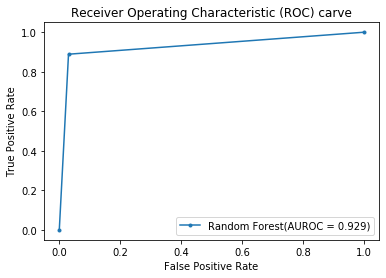

In [24]:
plt.plot(rf_fpr,rf_tpr,marker='.',label='Random Forest(AUROC = %0.3f)'%rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) carve')
plt.legend()
plt.show()

In [25]:
p,r,t=precision_recall_curve(ytest,pred)

Text(0, 0.5, 'Recall')

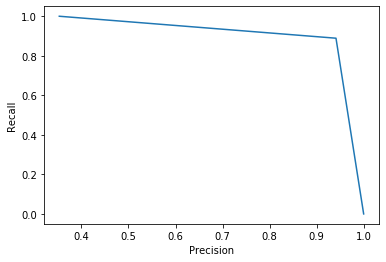

In [26]:
plt.plot(p,r,)
plt.xlabel('Precision')
plt.ylabel('Recall')

In [27]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [28]:
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
LR=LogisticRegression(max_iter=1000)
LR.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# prediction the algorithms value
dt_pred=DT.predict(xtest)
rf_pred=rfc.predict(xtest)
lr_pred=LR.predict(xtest)

In [31]:
# calculate the auc roc
rf_auc=roc_auc_score(ytest,rf_pred)
dt_auc=roc_auc_score(ytest,dt_pred)
lr_auc=roc_auc_score(ytest,lr_pred)

In [32]:
print('Random forest auc:',rf_auc)
print('Decision tree auc:',dt_auc)
print('Logistic Regression auc:',lr_auc)


Random forest auc: 0.9292929292929294
Decision tree auc: 0.8737373737373737
Logistic Regression auc: 0.8560606060606061


In [33]:
rf_fpr,rf_tpr,_=roc_curve(ytest,rf_pred)
dt_fpr,dt_tpr,_=roc_curve(ytest,dt_pred)
lr_fpr,lr_tpr,_=roc_curve(ytest,lr_pred)

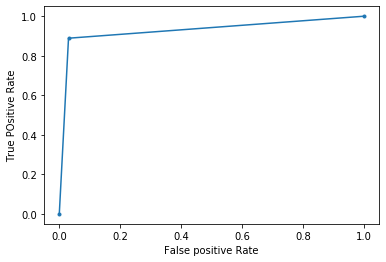

In [34]:
plt.plot(rf_fpr,rf_tpr,marker='.',label="Random Forest: %.3f"%rf_auc)
plt.xlabel('False positive Rate')
plt.ylabel('True POsitive Rate')

plt.show()


In [35]:
def plot_roc_curve(rf_fpr,rf_tpr):
    plt.title('ROC Curve Comparison')
    plt.plot(rf_fpr,rf_tpr,marker='.',label="Random Forest: %.3f"%rf_auc)
    plt.plot(dt_fpr,dt_tpr,marker='.',label="decision tree: %.3f"%dt_auc)
    plt.plot(lr_fpr,lr_tpr,marker='.',label="Logistic Regression: %.3f"%lr_auc)
    plt.xlabel('False positive Rate')
    plt.ylabel('True POsitive Rate')

    plt.legend()
    plt.show()

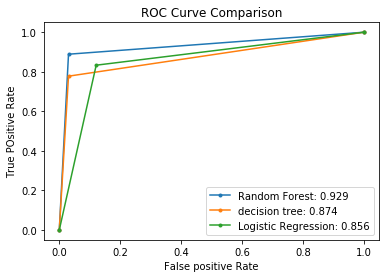

In [36]:
plot_roc_curve(rf_fpr,rf_tpr)

In [40]:
pip show keras


Name: keras
Version: 2.9.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: c:\users\administrator\anaconda3\lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [46]:
import tensorflow as tf

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates